# Model creation

## Libs

In [1]:
from prepareRSSI import RssiDatas
import pandas as pd
import parameters as param
import numpy as np
import tensorflow as tf
#import intel-tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K # to set the learning rate

## Import the RSSI, mac and zones values

In [2]:
RSSI = RssiDatas()

#df = pd.read_csv(param.rssi_csv_output)
#df.head(100)

rssi_tmp = np.genfromtxt(param.rssi_csv_output, delimiter=',')
# deleting index column and row :
rssi_tmp = np.delete(rssi_tmp, 0, 1)
RSSI.rssi = np.delete(rssi_tmp, 0, 0)

#print("RSSI shape :",np.shape(RSSI.rssi))
#print("RSSI :\n",RSSI.rssi)

mac_tmp = np.genfromtxt(param.mac_csv_output, delimiter=',', dtype=str)
# deleting index column and row :
mac_tmp = mac_tmp[:,1] # keep only the column with the mac adresses
RSSI.mac = np.delete(mac_tmp, 0) # delete the first row because empty
# print("mac size : ", np.size(RSSI.mac))
#print("mac :\n",RSSI.mac)

zones_tmp = np.genfromtxt(param.zones_csv_output, delimiter=',')
# deleting index column and row :
zones_tmp = zones_tmp[:,1] # keep only the colomn with the zone ids
RSSI.zones = np.delete(zones_tmp, 0, 0) # delete the first row because empty

#print("Zones size :",np.size(RSSI.zones))
#print("Zones :\n",RSSI.zones)

## Pre load datas into model

In [3]:
print("RSSI.rssi : ", np.shape(RSSI.rssi))
print("RSSI.zones : ", np.shape(RSSI.zones))
zonesNb = 7 # number of zones

# create the zone output array of vectors :
y_zones = np.zeros([np.size(RSSI.zones), zonesNb])
for i in range(np.size(RSSI.zones)):
    y_zones[i, int(RSSI.zones[i])] = 1
#print(y_zones)
#print(np.shape(y_zones))

train_data, test_data, train_labels, test_labels = train_test_split(RSSI.rssi,y_zones)
print("train_data : ", np.shape(train_data))
print("train_labels : ", np.shape(train_labels))
print("test_data : ", np.shape(test_data))
print("test_labels : ", np.shape(test_labels))
train_data = train_data/(-95)
test_data = test_data/(-95)
train_labels = train_labels
test_labels = test_labels
print(np.shape(train_data))
print(np.shape(train_labels))

RSSI.rssi :  (265, 128)
RSSI.zones :  (265,)
train_data :  (198, 128)
train_labels :  (198, 7)
test_data :  (67, 128)
test_labels :  (67, 7)
(198, 128)
(198, 7)


## Create the model

In [4]:
model = tf.keras.models.Sequential([
  #tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dropout(param.dropout),
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dropout(param.dropout),
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dropout(param.dropout),
  tf.keras.layers.Dense(7)
])

## Compile the model

In [5]:
model.compile(optimizer='adam',
              #loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])
K.set_value(model.optimizer.learning_rate, param.learningRate)

## Train the model

In [6]:
## feed the model :
#history = model.fit(train_data, train_labels, epochs=param.epochs)
## evaluate accuracy
#test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)

# feed the model :
history = model.fit(train_data, train_labels,
                    epochs=param.epochs,
                    validation_data=(test_data, test_labels))

Epoch 1/1000
7/7 [==============================] - 0s 17ms/step - loss: 0.4221 - accuracy: 0.0758 - val_loss: 0.2101 - val_accuracy: 0.1045
Epoch 2/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2672 - accuracy: 0.1313 - val_loss: 0.1524 - val_accuracy: 0.1493
Epoch 3/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2308 - accuracy: 0.1313 - val_loss: 0.1354 - val_accuracy: 0.0448
Epoch 4/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2120 - accuracy: 0.1717 - val_loss: 0.1306 - val_accuracy: 0.1343
Epoch 5/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2057 - accuracy: 0.1061 - val_loss: 0.1296 - val_accuracy: 0.1343
Epoch 6/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1777 - accuracy: 0.1667 - val_loss: 0.1285 - val_accuracy: 0.1343
Epoch 7/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1823 - accuracy: 0.1313 - val_loss: 0.1279 - val_accuracy: 0.1343
Epoch 8/1000
7/7 [=

7/7 [==============================] - 0s 4ms/step - loss: 0.1205 - accuracy: 0.2727 - val_loss: 0.1136 - val_accuracy: 0.3433
Epoch 60/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1203 - accuracy: 0.3081 - val_loss: 0.1132 - val_accuracy: 0.3284
Epoch 61/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1183 - accuracy: 0.2778 - val_loss: 0.1130 - val_accuracy: 0.3582
Epoch 62/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1160 - accuracy: 0.2677 - val_loss: 0.1130 - val_accuracy: 0.3731
Epoch 63/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1199 - accuracy: 0.2576 - val_loss: 0.1128 - val_accuracy: 0.4179
Epoch 64/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.1187 - accuracy: 0.3081 - val_loss: 0.1122 - val_accuracy: 0.4328
Epoch 65/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1175 - accuracy: 0.3030 - val_loss: 0.1122 - val_accuracy: 0.4627
Epoch 66/1000
7/7 [========

7/7 [==============================] - 0s 3ms/step - loss: 0.1023 - accuracy: 0.4899 - val_loss: 0.0921 - val_accuracy: 0.7761
Epoch 118/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.5404 - val_loss: 0.0914 - val_accuracy: 0.7612
Epoch 119/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0983 - accuracy: 0.5253 - val_loss: 0.0910 - val_accuracy: 0.7313
Epoch 120/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0986 - accuracy: 0.5455 - val_loss: 0.0907 - val_accuracy: 0.7313
Epoch 121/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0997 - accuracy: 0.5051 - val_loss: 0.0909 - val_accuracy: 0.7313
Epoch 122/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0964 - accuracy: 0.5657 - val_loss: 0.0902 - val_accuracy: 0.7463
Epoch 123/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0978 - accuracy: 0.5606 - val_loss: 0.0893 - val_accuracy: 0.7463
Epoch 124/1000
7/7 [=

Epoch 175/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0785 - accuracy: 0.7273 - val_loss: 0.0696 - val_accuracy: 0.8209
Epoch 176/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0773 - accuracy: 0.7525 - val_loss: 0.0693 - val_accuracy: 0.8358
Epoch 177/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0788 - accuracy: 0.7020 - val_loss: 0.0696 - val_accuracy: 0.8806
Epoch 178/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0783 - accuracy: 0.7424 - val_loss: 0.0685 - val_accuracy: 0.8507
Epoch 179/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0755 - accuracy: 0.7424 - val_loss: 0.0681 - val_accuracy: 0.8507
Epoch 180/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0769 - accuracy: 0.7828 - val_loss: 0.0676 - val_accuracy: 0.8507
Epoch 181/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0781 - accuracy: 0.7778 - val_loss: 0.0673 - val_accuracy: 0.8806
Epoch 

Epoch 233/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0634 - accuracy: 0.8283 - val_loss: 0.0477 - val_accuracy: 0.8806
Epoch 234/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0586 - accuracy: 0.8384 - val_loss: 0.0479 - val_accuracy: 0.8806
Epoch 235/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0604 - accuracy: 0.8434 - val_loss: 0.0480 - val_accuracy: 0.9104
Epoch 236/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0605 - accuracy: 0.8333 - val_loss: 0.0476 - val_accuracy: 0.9104
Epoch 237/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0596 - accuracy: 0.8535 - val_loss: 0.0474 - val_accuracy: 0.8806
Epoch 238/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0593 - accuracy: 0.8636 - val_loss: 0.0465 - val_accuracy: 0.9104
Epoch 239/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.8737 - val_loss: 0.0464 - val_accuracy: 0.9403
Epoch 

Epoch 291/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.8939 - val_loss: 0.0326 - val_accuracy: 0.9552
Epoch 292/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.8939 - val_loss: 0.0333 - val_accuracy: 0.9851
Epoch 293/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0442 - accuracy: 0.9444 - val_loss: 0.0323 - val_accuracy: 0.9701
Epoch 294/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0452 - accuracy: 0.9242 - val_loss: 0.0320 - val_accuracy: 0.9403
Epoch 295/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0455 - accuracy: 0.8889 - val_loss: 0.0325 - val_accuracy: 0.9701
Epoch 296/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.8939 - val_loss: 0.0311 - val_accuracy: 1.0000
Epoch 297/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0455 - accuracy: 0.9394 - val_loss: 0.0314 - val_accuracy: 0.9851
Epoch 

Epoch 349/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9798 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 350/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9596 - val_loss: 0.0224 - val_accuracy: 0.9851
Epoch 351/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9697 - val_loss: 0.0223 - val_accuracy: 1.0000
Epoch 352/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9394 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 353/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9444 - val_loss: 0.0232 - val_accuracy: 1.0000
Epoch 354/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9646 - val_loss: 0.0226 - val_accuracy: 0.9701
Epoch 355/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9444 - val_loss: 0.0223 - val_accuracy: 0.9701
Epoch 

Epoch 407/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9798 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 408/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0299 - accuracy: 0.9848 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 409/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9798 - val_loss: 0.0176 - val_accuracy: 0.9851
Epoch 410/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9747 - val_loss: 0.0170 - val_accuracy: 0.9851
Epoch 411/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0315 - accuracy: 0.9697 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 412/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9495 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 413/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9495 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 

Epoch 465/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9798 - val_loss: 0.0133 - val_accuracy: 0.9851
Epoch 466/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9899 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 467/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9848 - val_loss: 0.0129 - val_accuracy: 0.9851
Epoch 468/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9848 - val_loss: 0.0138 - val_accuracy: 0.9701
Epoch 469/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9798 - val_loss: 0.0137 - val_accuracy: 1.0000
Epoch 470/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9848 - val_loss: 0.0127 - val_accuracy: 1.0000
Epoch 471/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9747 - val_loss: 0.0136 - val_accuracy: 1.0000
Epoch 

Epoch 523/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0224 - accuracy: 0.9798 - val_loss: 0.0111 - val_accuracy: 0.9851
Epoch 524/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9899 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 525/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9949 - val_loss: 0.0114 - val_accuracy: 1.0000
Epoch 526/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9899 - val_loss: 0.0106 - val_accuracy: 0.9851
Epoch 527/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9949 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 528/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9798 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 529/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9798 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 

Epoch 581/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 0.9851
Epoch 582/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 583/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9949 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 584/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9848 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 585/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9949 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 586/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9949 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 587/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9899 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 

Epoch 639/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 640/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 641/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9848 - val_loss: 0.0070 - val_accuracy: 0.9851
Epoch 642/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9949 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 643/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9949 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 644/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9949 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 645/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0174 - accuracy: 0.9899 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 

Epoch 697/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 698/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 0.9851
Epoch 699/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0171 - accuracy: 0.9899 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 700/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9949 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 701/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9899 - val_loss: 0.0061 - val_accuracy: 0.9851
Epoch 702/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0162 - accuracy: 0.9949 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 703/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 

Epoch 755/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 0.9851
Epoch 756/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 0.9851
Epoch 757/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9949 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 758/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 759/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 0.9949 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 760/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9949 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 761/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 

Epoch 813/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 0.9851
Epoch 814/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 815/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 816/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0143 - accuracy: 0.9949 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 817/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0137 - accuracy: 0.9949 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 818/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 819/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0146 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 

Epoch 871/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 872/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 873/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.9899 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 874/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 875/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 0.9949 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 876/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 877/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9899 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 

Epoch 929/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0131 - accuracy: 0.9949 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 930/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 931/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 932/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0138 - accuracy: 0.9949 - val_loss: 0.0049 - val_accuracy: 0.9851
Epoch 933/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0111 - accuracy: 0.9949 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 934/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 935/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 

Epoch 987/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 988/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 0.9851
Epoch 989/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 990/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 991/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 992/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 0.9851
Epoch 993/1000
7/7 [==============================] - 0s 4ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 

## Ploting learning datas

Text(0.5, 0, 'Epoch')

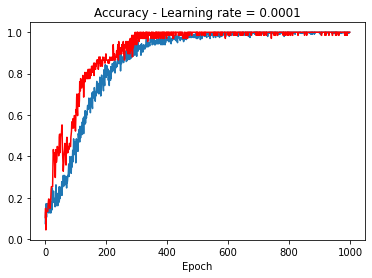

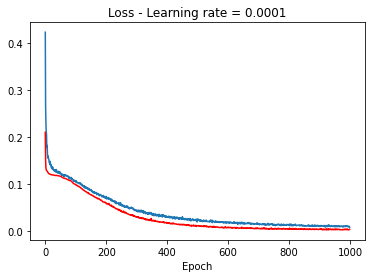

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(1)
plt.plot(acc, label="train_acc")
plt.plot(val_acc,color="red", label="train_acc")
plt.title("Accuracy - Learning rate = " + str(param.learningRate))
plt.xlabel("Epoch")
#name = "plot_accuracy_lr_" + str(learningRate) + ".svg"
#name = name.replace(".", ",", 1)
#plt.savefig(name, format="svg")

plt.figure(2)
plt.plot(loss, label="train_loss")
plt.plot(val_loss,color="red", label="val_loss")
plt.title("Loss - Learning rate = " + str(param.learningRate))
plt.xlabel("Epoch")
#name = "plot_loss_lr_" + str(learningRate) + ".svg"
#name = name.replace(".", ",", 1)
#plt.savefig(name, format="svg")

